In [1]:
import pandas as pd

In [2]:
ds_train = pd.read_csv('datasets/Google_Stock_Price_Train.csv')

In [3]:
ds_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
ds_train.shape

(1258, 6)

In [5]:
ds_test = pd.read_csv('datasets/Google_Stock_Price_Test.csv')

In [6]:
ds_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [7]:
ds_test.shape

(20, 6)

In [8]:
training_set = ds_train[['Open']]

In [9]:
training_set.shape

(1258, 1)

<AxesSubplot:>

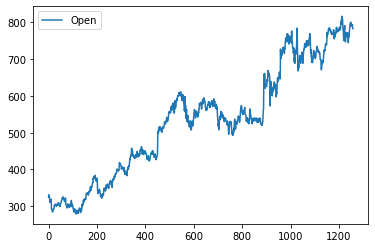

In [10]:
training_set.plot()

In [11]:
test_set = ds_test[['Open']]

<AxesSubplot:>

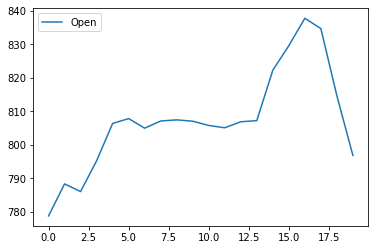

In [12]:
test_set.plot()

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
normalizer = MinMaxScaler(feature_range=(0,1))

In [15]:
training_set_scaled = normalizer.fit_transform(training_set)

In [16]:
training_set_scaled.shape

(1258, 1)

In [17]:
training_set_scaled[:,0]

array([0.08581368, 0.09701243, 0.09433366, ..., 0.95725128, 0.93796041,
       0.93688146])

In [18]:
X_train = []

In [19]:
y_train = []

In [20]:
steps = 60

In [21]:
for i in range(len(training_set_scaled) - steps):
    X_train.append(training_set_scaled[i:i+steps])
    y_train.append(training_set_scaled[i+steps])
    

In [46]:
len(X_train)

1198

In [23]:
import numpy as np

In [24]:
trainX = np.array(X_train)

In [25]:
trainX.shape

(1198, 60, 1)

In [26]:
trainY = np.array(y_train)

In [27]:
trainY.shape

(1198, 1)

In [28]:
from keras.models import Sequential

In [29]:
model = Sequential()

In [30]:
from keras.layers import Dense
from keras.layers import LSTM

In [31]:
model.add(LSTM(units=60, input_shape=(60,1), return_sequences=True))

In [32]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 60, 1),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'lstm_input'}},
  {'class_name': 'LSTM',
   'config': {'name': 'lstm',
    'trainable': True,
    'batch_input_shape': (None, 60, 1),
    'dtype': 'float32',
    'return_sequences': True,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'time_major': False,
    'units': 60,
    'activation': 'tanh',
    'recurrent_activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'recurrent_initializer': {'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'unit_forget_bias': True,
    'kernel_regularizer': None,
    'recurrent_regularizer': None,
    'bias_regularizer': None,
    'activ

In [33]:
model.add(LSTM(units=60, return_sequences=True))

In [34]:
model.add(LSTM(units=60))

In [35]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 60, 1),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'lstm_input'}},
  {'class_name': 'LSTM',
   'config': {'name': 'lstm',
    'trainable': True,
    'batch_input_shape': (None, 60, 1),
    'dtype': 'float32',
    'return_sequences': True,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'time_major': False,
    'units': 60,
    'activation': 'tanh',
    'recurrent_activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'recurrent_initializer': {'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'unit_forget_bias': True,
    'kernel_regularizer': None,
    'recurrent_regularizer': None,
    'bias_regularizer': None,
    'activ

In [36]:
model.add(Dense(units=1, activation='linear'))

In [37]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [38]:
model.fit(trainX, trainY, epochs=100)

Epoch 1/100
38/38 [==============================] - 20s 39ms/step - loss: 0.0556
Epoch 2/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0020
Epoch 3/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0015
Epoch 4/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0014
Epoch 5/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0016
Epoch 6/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0018
Epoch 7/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0013
Epoch 8/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0013
Epoch 9/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0018
Epoch 10/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0013
Epoch 11/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0012
Epoch 12/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0013
Epoch 13/100
38/38 [====

In [48]:
l = model.history.history['loss']

In [49]:
pdl = pd.DataFrame(l)

<AxesSubplot:>

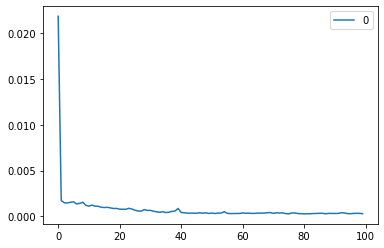

In [50]:
pdl.plot()